In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

In [5]:
file='data/auto-mpg.csv'
autoDF = pd.read_csv(file)
autoDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [6]:
autoDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [7]:
autoDF=autoDF.dropna()

In [8]:
autoDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64

In [9]:
data = autoDF[autoDF.columns[1:]]
target = autoDF['mpg']

In [10]:
print(f'data => {data.shape}, {data.ndim}차원')
print(f'target => {target.shape},{target.ndim}차원')

print(f'0번행 데이터 ===>\n{data.iloc[0]}\n\n0번행 라벨 ===> {target[0]}')

data => (396, 6), 2차원
target => (396,),1차원
0번행 데이터 ===>
cylinders          8.0
displacement     307.0
horsepower       130.0
weight          3504.0
acceleration      12.0
model-year        70.0
Name: 0, dtype: float64

0번행 라벨 ===> 18.0


# 모델 설계

In [11]:
autoModel = Sequential(name ='autoMODEL')

In [12]:
# 입력층
autoModel.add(Dense(10, input_shape=(6,),name='ln'))
autoModel.add(Activation('relu'))

In [13]:
#은닉층
autoModel.add(Dense(12, activation='relu', name='Hidd1'))
autoModel.add(Dense(8, activation='relu', name='Hidd2'))
autoModel.add(Dense(6, activation='relu', name='Hidd3'))
autoModel.add(Dense(4, activation='relu', name='Hidd4'))
autoModel.add(Dense(2, activation='relu', name='Hidd5'))
autoModel.add(Dense(14, activation='relu', name='Hidd6'))

In [14]:
# 출력층
autoModel.add(Dense(1, activation='softmax',name='Out'))

In [15]:
autoModel.summary()

Model: "autoMODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ln (Dense)                  (None, 10)                70        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 Hidd1 (Dense)               (None, 12)                132       
                                                                 
 Hidd2 (Dense)               (None, 8)                 104       
                                                                 
 Hidd3 (Dense)               (None, 6)                 54        
                                                                 
 Hidd4 (Dense)               (None, 4)                 28        
                                                                 
 Hidd5 (Dense)               (None, 2)                 10

# 모델 생성

# 학습

In [22]:
import keras.backend as K
from keras import callbacks
from keras.models import load_model


# 에포크가 끝날 때마다 .을 출력
class Printdot(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):  # 'epochs'를 'epoch'으로 수정
        if epoch % 100 == 0:
            print('')
        print('.', end='')

EPOCHS = 500

# 모델 컴파일 시 커스텀 메트릭 추가
autoModel.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['mae','mse'])

history = autoModel.fit(data, target,
                        epochs=EPOCHS,
                        validation_split=0.2,
                        verbose=0,
                        callbacks=[Printdot()])

print('학습 종료')





....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................학습 종료


# 모델 학습 과정 정보 확인

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,459.952423,20.373102,459.952423,996.002319,30.986248,996.002319,0
1,459.952484,20.373100,459.952484,996.002319,30.986248,996.002319,1
2,459.952393,20.373100,459.952393,996.002319,30.986248,996.002319,2
3,459.952393,20.373100,459.952393,996.002319,30.986248,996.002319,3
4,459.952423,20.373102,459.952423,996.002319,30.986248,996.002319,4
...,...,...,...,...,...,...,...
495,459.952484,20.373100,459.952484,996.002319,30.986248,996.002319,495
496,459.952423,20.373100,459.952423,996.002319,30.986248,996.002319,496
497,459.952423,20.373100,459.952423,996.002319,30.986248,996.002319,497
498,459.952423,20.373100,459.952423,996.002319,30.986248,996.002319,498


In [24]:
epochs, values = hist ['epoch'].values, hist['mae'].values

In [29]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('MAE[MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label = 'Val Error')
    
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('MSE [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()



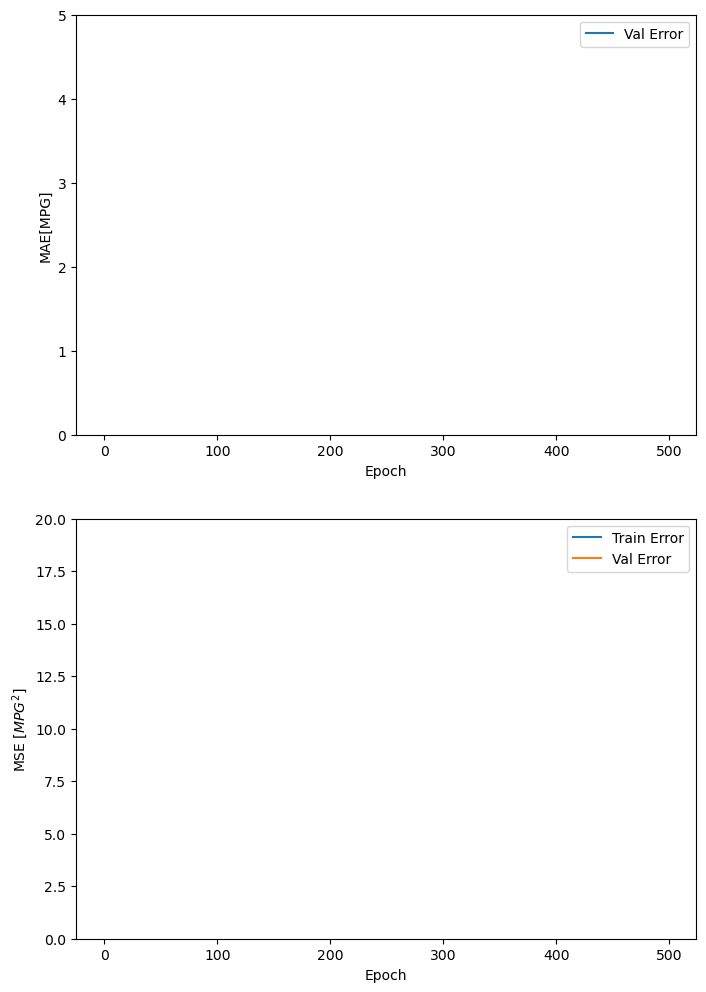

In [30]:
plot_history(history)